# reduced dark and flat

In order to perform the flat field correction (optional in nabu) an acquisition must contains `reduced` dark and flats.

Those `reduced` darks and flats comme from raw frames 'darks' and 'flats' frames.
In general we expect those frames to be part of the NXtomo and call the `dark and flat field construction` widget to generate the reduced one.

## reduced dark and flat field widget ![dark flat](img/icons/darkflatwidget_icon.png)

This is usualy the first processing to run. This way the flat field correction can be done and is useful and / or required by many processes

By default the `reduced` dark(s) is obtained by computing the `mean` of raw dark frames and the `reduced` flat(s) is obtained by computing the `median` of the flat(s)

In [1]:
from IPython.display import Video

Video("video/reduced_darks_flats_widget.mp4", embed=True, height=500)

* since *tomoscan==1.0* (and *nabu==2022.2*, *tomwer==1.0*) reduced darks and flats are saved under `{dataset_prefix}_darks.hdf5` and `{dataset_prefix}_flats.hdf5` files.
* for spec acquisition the reduced darks and flats will be duplicated (to dark.edf and refHSTXXXX.edf to insure backward compatibility

Here is a screenshot of a reduced_flats file containing a single serie of flat at the beginning

![scrneeshot reduced darks](img/reduced_darks_screenshot.png)

## copying dark(s) and flat(s)


In some cases it might happen that users need to reuse reduced darks or flats.

If the reduced darks and flats already exists then you can simply use the 'copy' from the `reduced dark and flat widget`

!!! The copy option is activated by default !!!

* `auto` mode: Each time it mets a dataset with reduced dark / flat it will keep them in cache. And when it mets a dataset with dark / flat missing it will copy them to it.

![](img/dark_flat_copy.png)


* `manual` mode: user can provide an URL to well formed reduced darks and reduced flats HDF5 dataset

![](img/dark_flat_copy_manual.png)

note: the darks and flats cache file is provided at the bottom of the widget. This can be a good to check the registration goes as expected.

### from a python script

You can also create those following the tomoscan python API like

* provide reduced darks and flats as a dictionary (key is the index and value is a 2D numpy array)

``` python
from tomwer.core.scan.hdf5scan import HDF5TomoScan
# from tomwer.core.scan.edfscan import EDFTomoScan
# same API for EDF or HDF5

scan = HDF5TomoScan(file_path, data_path)
darks = {
    0: numpy.array(...),  # darks at start
}
flats = {
    0: numpy.array(...),  # flats at start
    3000: numpy.array(...),   # flats at end
}

scan.save_reduced_darks(darks)
scan.save_reduced_flats(flats)
# to provide information about 'machine_electric_current' for normalization you must also provide `darks_infos` and `flats_infos`

```

* provide reduced darks and flats from already existing HDF5 dataset

``` python
from tomoscan.esrf.scan.utils import copy_darks_to, copy_flats_to


# create darks and flats as numpy array
darks = {
    0: numpy.ones((100, 100), dtype=numpy.float32),
}
flats = {
    1: numpy.ones((100, 100), dtype=numpy.float32) * 2.0,
    100: numpy.ones((100, 100), dtype=numpy.float32) * 2.0,
}

original_dark_flat_file = os.path.join(tmp_path, "originals.hdf5")

dicttoh5(darks, h5file=original_dark_flat_file, h5path="darks", mode="a")
dicttoh5(flats, h5file=original_dark_flat_file, h5path="flats", mode="a")

# create darks and flats URL
darks_url = DataUrl(
    file_path=original_dark_flat_file,
    data_path="/darks",
    scheme="silx",
)
flats_url = DataUrl(
    file_path=original_dark_flat_file,
    data_path="/flats",
    scheme="silx",
)

# apply the copy
scan = HDF5TomoScan(...)
copy_flats_to(scan=scan, flats_url=flats_url, save=True)
copy_flats_to(scan=scan, flats_url=flats_url, save=True)
```

### hand -on Exercice A

copy datasets from `/data/projects/tomo-sample-data/training/part3_dark_flat/WGN_01_0000_P_110_8128_D_129` to a local folder
This folder contains two datasets:

* WGN_01_0000_P_110_8128_D_129_0000.nx which contains darks and flats
* WGN_01_0000_P_110_8128_D_129_0001.nx without any darks or flats

The goal is or reconstruct WGN_01_0000_P_110_8128_D_129_0001.nx using darks and flats from WGN_01_0000_P_110_8128_D_129_0000.nx

You can either use some gui from tomwer, and/or some python script and/or some CLI.

---

## computing reduced flats from projection

It can happen that sometime you have a bliss dataset containing projections that must be used as flats in order to compute the reduced flats (dataset 1).
And that this reduced flats must be used by other datasets (datasets 2*).

In this case you can do the following actions:

* preprocessing (computing reduced flats from dataset 1)
   * convert dataset 1 NXtomo image_key projections to flats (using `image-key-editor` or `image-key-upgrader` widget.
   * then compute reduced flat from those raw flats (using `reduced dark and flat` widget ).
   * copy this reduced flats to the datasets 2 (by providing url to the reduced flats or setting them directly from the `reduced flats` input as show in the video)
* processing (reconstructing datasets 2*)
   * compute reduced darks (from raw) and copy reduced flats from dataset 1 using the `reduced dark and flat` widget (`reduced flat` have been set during pre processing.
   * then create the workflow you want to process (`default center of rotation`, `nabu slice` and `data viewer` on the video)


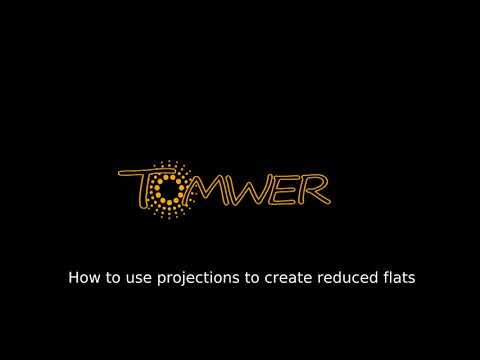

In [2]:
from IPython.display import YouTubeVideo

YouTubeVideo("vJOo0rHHUYk", height=500, width=800)

Note: if the processing is done before the flat copy is done or if this one fails then flat field will fail. And you might encounter the following error:
```
2023-03-06 16:04:45,967 [ERROR] cannot make flat field correction, flat not found [tomwer.core.scan.scanbase](scanbase.py:177)
2023-03-06 16:04:45,967:ERROR:tomwer.core.scan.scanbase: cannot make flat field correction, flat not found
```